In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('http://bit.ly/kaggletrain')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.barh(np.arange(n_features), importances[indices], align='center')
    feature_names = np.array(X.columns)
    plt.yticks(np.arange(n_features), feature_names[indices])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

In [3]:
df['Sex_Code'] = df['Sex'].map({'female':1, 'male':0}).astype('int')
df['Sex'] = df['Sex_Code']
df['Age'] = df['Age'].fillna(df['Age'].mean())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C,0


In [4]:
X = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]

In [5]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


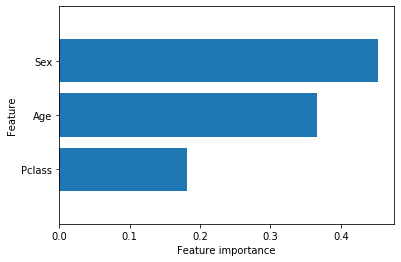

In [6]:
plot_feature_importances(clf)

In [7]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


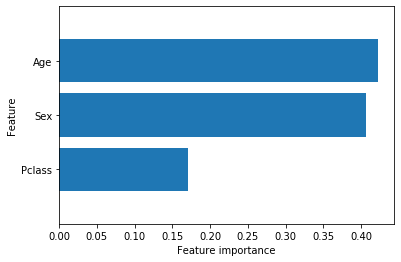

In [8]:
plot_feature_importances(clf)

In [9]:
# XGBoost
from xgboost.sklearn import XGBClassifier
clf = XGBClassifier(random_state = 43)
clf.fit(X,y)
two = {"Pclass":[3,1], "Sex":[0,1], "Age":[23.0,20.0]}
df1 = pd.DataFrame(two)
#Jack = clf.predict([[3, 0, 23.0]])
Jack = clf.predict(df1.iloc[0:1])
print("Jack", Jack)
Rose = clf.predict(df1.iloc[1:2])
print("Rose", Rose)

Jack [0]
Rose [1]


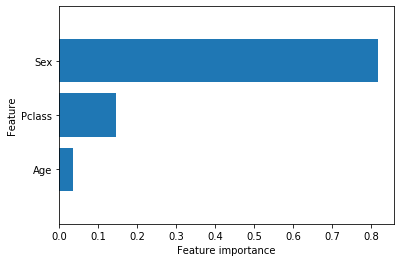

In [10]:
plot_feature_importances(clf)

In [11]:
# SVC
from sklearn import svm
clf = svm.SVC(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [0]


In [12]:
# K-NN
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


In [14]:
df = pd.read_csv('http://bit.ly/kaggletrain')
df['Sex_Code'] = df['Sex'].map({'female':1, 'male':0}).astype('int')
df['Sex'] = df['Sex_Code']
df['Age'] = df['Age'].fillna(df['Age'].max())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,80.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,0


In [15]:
X = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]

In [16]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


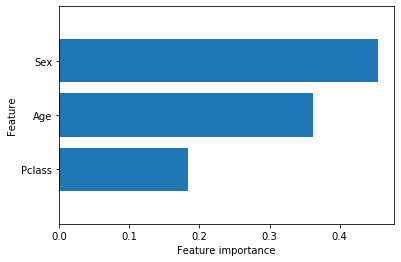

In [17]:
plot_feature_importances(clf)

In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


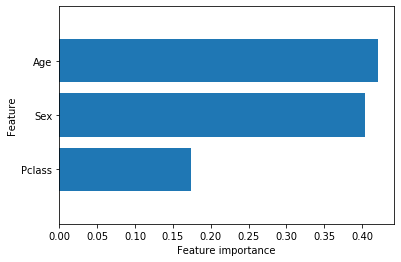

In [19]:
plot_feature_importances(clf)

In [20]:
# XGBoost
from xgboost.sklearn import XGBClassifier
clf = XGBClassifier(random_state = 43)
clf.fit(X,y)
two = {"Pclass":[3,1], "Sex":[0,1], "Age":[23.0,20.0]}
df1 = pd.DataFrame(two)
#Jack = clf.predict([[3, 0, 23.0]])
Jack = clf.predict(df1.iloc[0:1])
print("Jack", Jack)
Rose = clf.predict(df1.iloc[1:2])
print("Rose", Rose)

Jack [0]
Rose [1]


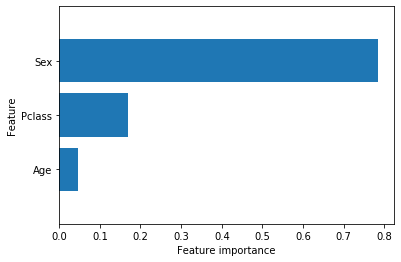

In [21]:
plot_feature_importances(clf)

In [22]:
# SVC
from sklearn import svm
clf = svm.SVC(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [0]


In [23]:
# K-NN
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


In [25]:
df = pd.read_csv('http://bit.ly/kaggletrain')
df['Sex_Code'] = df['Sex'].map({'female':1, 'male':0}).astype('int')
df['Sex'] = df['Sex_Code']
df['Age'] = df['Age'].fillna(df['Age'].min())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.00,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.00,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.42,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.00,0,0,111369,30.0000,C148,C,0


In [26]:
X = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]

In [27]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


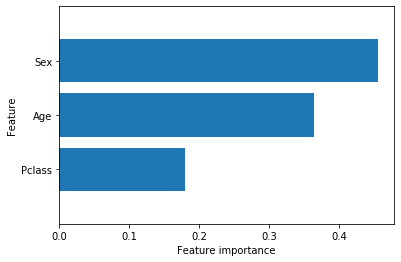

In [28]:
plot_feature_importances(clf)

In [29]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


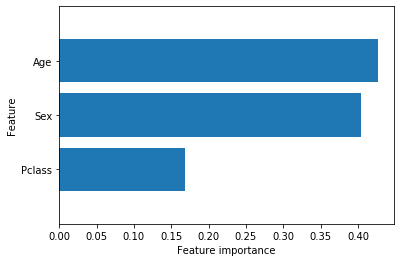

In [30]:
plot_feature_importances(clf)

In [31]:
# XGBoost
from xgboost.sklearn import XGBClassifier
clf = XGBClassifier(random_state = 43)
clf.fit(X,y)
two = {"Pclass":[3,1], "Sex":[0,1], "Age":[23.0,20.0]}
df1 = pd.DataFrame(two)
#Jack = clf.predict([[3, 0, 23.0]])
Jack = clf.predict(df1.iloc[0:1])
print("Jack", Jack)
Rose = clf.predict(df1.iloc[1:2])
print("Rose", Rose)

Jack [0]
Rose [1]


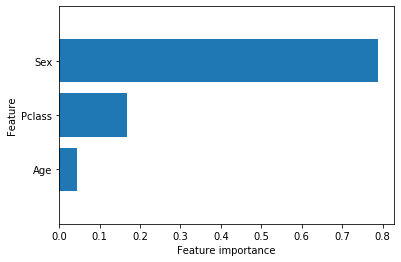

In [32]:
plot_feature_importances(clf)

In [33]:
# SVC
from sklearn import svm
clf = svm.SVC(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [0]


In [34]:
# K-NN
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 43)
clf.fit(X,y)
Jack = clf.predict([[3, 0, 23.0]])
print("Jack", Jack)
Rose = clf.predict([[1, 1, 20.0]])
print("Rose", Rose)

Jack [0]
Rose [1]


In [ ]:
# for DT
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, leaves_parallel=True)
graph = graphviz.Source(dot_data)
graph.render("DT", format="png")
graph